In [1]:
# Reading an excel file using Python 
import xlrd 
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi #Used in Radar Plots
import seaborn as sns
sns.set_style(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

missing_values=["N/a","na",np.nan,"","NaN"]
df_fifa = pd.read_csv('players_20.csv',na_values=missing_values)
#df_data_1 = pd.read_csv(body)
df_fifa.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [4]:
print("before data cleaning\n")
print(df_fifa.isnull().sum()) # checking number of missing values in each column before data cleaning
#DATAcleaning using forward fill
df_fifa=df_fifa.fillna(method='ffill')
print("\nafter data cleaning\n")
print(df_fifa.isnull().sum()) #checking number of missing values in each column after data cleaning


before data cleaning

sofifa_id                       0
player_url                      0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur           1298
player_tags                 16779
team_position                 240
team_jersey_number            240
loaned_from                 17230
joined                       1288
contract_valid_until      

In [5]:
new_player_pos = df_fifa['player_positions'].str.get_dummies(sep =', ').add_prefix('Position_')
new_player_pos.head()

Position_CAM  Position_CB  Position_CDM  Position_CF  Position_CM  \
0             0            0             0            1            0   
1             0            0             0            0            0   
2             1            0             0            0            0   
3             0            0             0            0            0   
4             0            0             0            1            0   

   Position_GK  Position_LB  Position_LM  Position_LW  Position_LWB  \
0            0            0            0            0             0   
1            0            0            0            1             0   
2            0            0            0            1             0   
3            1            0            0            0             0   
4            0            0            0            1             0   

   Position_RB  Position_RM  Position_RW  Position_RWB  Position_ST  
0            0            0            1             0            1  
1            0            0            0             0            1  
2            0            0            0             0            0  
3            0            0            0             0            0  
4            0            0            0             0            0

In [6]:
df_fifa = pd.concat([df_fifa,new_player_pos], axis=1)
df_fifa.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3  #Speedster, #Dribbler, #Playmaker  , #Crosser,...            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0  91.0      85.0     87.0       95.0   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [7]:
df_fifa = df_fifa.drop('player_positions', axis=1)

In [8]:
#Position Columns ratings
#Clean, Process and Assign the new attributes to columns listed below.
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']
df_fifa[columns].head()

ls    st    rs    lw    lf    cf    rf    rw   lam   cam   ram    lm  \
0  89+2  89+2  89+2  93+2  93+2  93+2  93+2  93+2  93+2  93+2  93+2  92+2   
1  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3   
2  84+3  84+3  84+3  90+3  89+3  89+3  89+3  90+3  90+3  90+3  90+3  89+3   
3  84+3  84+3  84+3  90+3  89+3  89+3  89+3  90+3  90+3  90+3  90+3  89+3   
4  83+3  83+3  83+3  89+3  88+3  88+3  88+3  89+3  89+3  89+3  89+3  89+3   

    lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb  \
0  87+2  87+2  87+2  92+2  68+2  66+2  66+2  66+2  68+2  63+2  52+2  52+2   
1  81+3  81+3  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3   
2  82+3  82+3  82+3  89+3  66+3  61+3  61+3  61+3  66+3  61+3  46+3  46+3   
3  82+3  82+3  82+3  89+3  66+3  61+3  61+3  61+3  66+3  61+3  46+3  46+3   
4  83+3  83+3  83+3  89+3  66+3  63+3  63+3  63+3  66+3  61+3  49+3  49+3   

    rcb    rb  
0  52+2  63+2  
1  53+3  61+3  
2  46+3  61+3  
3  46+3  61+3  
4  49+3  61+3

In [9]:
#let's omit the '+' sign

for col in columns:
    df_fifa[col] = df_fifa[col].str.split('+', n=1, expand= True)[0]

df_fifa[columns].head()

ls  st  rs  lw  lf  cf  rf  rw lam cam ram  lm lcm  cm rcm  rm lwb ldm cdm  \
0  89  89  89  93  93  93  93  93  93  93  93  92  87  87  87  92  68  66  66   
1  91  91  91  89  90  90  90  89  88  88  88  88  81  81  81  88  65  61  61   
2  84  84  84  90  89  89  89  90  90  90  90  89  82  82  82  89  66  61  61   
3  84  84  84  90  89  89  89  90  90  90  90  89  82  82  82  89  66  61  61   
4  83  83  83  89  88  88  88  89  89  89  89  89  83  83  83  89  66  63  63   

  rdm rwb  lb lcb  cb rcb  rb  
0  66  68  63  52  52  52  63  
1  61  65  61  53  53  53  61  
2  61  66  61  46  46  46  61  
3  61  66  61  46  46  46  61  
4  63  66  61  49  49  49  61

In [10]:
df_fifa[columns] = df_fifa[columns].fillna(0)

In [11]:
#converting into int
df_fifa[columns] = df_fifa[columns].astype(int)

In [12]:
df_fifa[columns].head()

ls  st  rs  lw  lf  cf  rf  rw  lam  cam  ram  lm  lcm  cm  rcm  rm  lwb  \
0  89  89  89  93  93  93  93  93   93   93   93  92   87  87   87  92   68   
1  91  91  91  89  90  90  90  89   88   88   88  88   81  81   81  88   65   
2  84  84  84  90  89  89  89  90   90   90   90  89   82  82   82  89   66   
3  84  84  84  90  89  89  89  90   90   90   90  89   82  82   82  89   66   
4  83  83  83  89  88  88  88  89   89   89   89  89   83  83   83  89   66   

   ldm  cdm  rdm  rwb  lb  lcb  cb  rcb  rb  
0   66   66   66   68  63   52  52   52  63  
1   61   61   61   65  61   53  53   53  61  
2   61   61   61   66  61   46  46   46  61  
3   61   61   61   66  61   46  46   46  61  
4   63   63   63   66  61   49  49   49  61

In [13]:
x_data=df_fifa[['pace','overall', 'shooting', 'passing', 'dribbling', 'defending', 'physic','skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots','goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes','Position_CAM','Position_CB','Position_CDM','Position_CF','Position_CM','Position_GK','Position_LB',
           'Position_LM','Position_LW','Position_LWB','Position_RB','Position_RM','Position_RW','Position_RWB','Position_ST',
          'wage_eur','age','potential' ]]
y_data=df_fifa[['club', 'short_name','nationality','team_position','value_eur']]

In [14]:
#Standardizing our data
x_data=(x_data-x_data.mean())/x_data.std()
x_data.head(5)

pace   overall  shooting   passing  dribbling  defending    physic  \
0  1.719266  3.993553  2.843337  3.332320   3.261684  -0.765381  0.124313   
1  1.983662  3.849667  2.914559  2.378650   2.583797  -1.009614  1.349434   
2  2.071794  3.705781  2.344778  2.855485   3.164843  -1.192790 -0.692435   
3  2.071794  3.561895  2.344778  2.855485   3.164843  -1.192790 -0.692435   
4  2.071794  3.561895  2.202333  2.760118   3.068002  -1.009614  0.124313   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0         2.187291     2.479202           2.942082            2.573133   
1         1.764662     1.827842           1.909594            1.589298   
2         2.134462     2.207802           2.540559            1.851654   
3        -2.303145    -1.863199          -1.646755           -0.837496   
4         2.081634     1.936402           2.081675            1.982832   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0            2.242163               1.775008               1.319004   
1            2.003241               1.642049               1.790455   
2            2.182433               1.974446               1.655755   
3           -1.700047              -1.416008              -0.297401   
4            2.122702               1.974446               1.588405   

   movement_agility  power_jumping  power_stamina  power_strength  \
0          1.991783       0.257401       0.756059        0.220605   
1          1.586607       2.519833       1.380358        1.018383   
2          2.194371      -0.329156       1.130638       -1.295174   
3          0.236020       1.095339      -1.366559        1.018383   
4          2.126841      -0.748125       1.317928       -0.178285   

   power_long_shots  goalkeeping_diving  goalkeeping_handling  \
0          2.442098           -0.596049             -0.315048   
1          2.390344           -0.539673             -0.315048   
2          1.924562           -0.426922             -0.432717   
3         -1.801694            3.970400              4.450520   
4          1.717548           -0.314170             -0.256214   

   goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0            -0.073008                -0.138187             -0.482862   
1            -0.073008                -0.138187             -0.316548   
2            -0.073008                -0.079832             -0.316548   
3             3.719051                 4.296792              4.007627   
4            -0.614731                -0.488317             -0.482862   

   Position_CAM  Position_CB  Position_CDM  Position_CF  Position_CM  \
0     -0.368943     -0.50685     -0.418837     6.862756    -0.514768   
1     -0.368943     -0.50685     -0.418837    -0.145706    -0.514768   
2      2.710298     -0.50685     -0.418837    -0.145706    -0.514768   
3     -0.368943     -0.50685     -0.418837    -0.145706    -0.514768   
4     -0.368943     -0.50685     -0.418837     6.862756    -0.514768   

   Position_GK  Position_LB  Position_LM  Position_LW  Position_LWB  \
0    -0.354044    -0.351691    -0.389611    -0.238143      -0.13242   
1    -0.354044    -0.351691    -0.389611     4.198934      -0.13242   
2    -0.354044    -0.351691    -0.389611     4.198934      -0.13242   
3     2.824353    -0.351691    -0.389611    -0.238143      -0.13242   
4    -0.354044    -0.351691    -0.389611     4.198934      -0.13242   

   Position_RB  Position_RM  Position_RW  Position_RWB  Position_ST  \
0    -0.351004    -0.380808     4.205733     -0.128736     2.148280   
1    -0.351004    -0.380808    -0.237758     -0.128736     2.148280   
2    -0.351004    -0.380808    -0.237758     -0.128736    -0.465463   
3    -0.351004    -0.380808    -0.237758     -0.128736    -0.465463   
4    -0.351004    -0.380808    -0.237758     -0.128736    -0.465463   

    wage_eur       age  potential  
0  26.018663  1.442293   3.657056  
1  18.525120  1.871758   3.494181  
2  13.139135  0.368633   3.33130

In [15]:
x_data.mean()

pace                       1.932412e-16
overall                   -3.329109e-14
shooting                  -1.284319e-15
passing                    3.935127e-15
dribbling                  5.539939e-16
defending                 -1.048349e-15
physic                    -5.151045e-15
skill_dribbling           -8.722795e-15
skill_curve                1.996561e-15
skill_fk_accuracy          2.450809e-15
skill_long_passing        -7.989282e-15
skill_ball_control         3.094448e-15
movement_acceleration      1.602158e-15
movement_sprint_speed      1.050362e-15
movement_agility          -4.836376e-16
power_jumping              1.118575e-16
power_stamina             -1.377374e-15
power_strength            -1.259137e-14
power_long_shots          -1.093689e-15
goalkeeping_diving         5.860651e-16
goalkeeping_handling       3.221821e-16
goalkeeping_kicking        5.268730e-16
goalkeeping_positioning    2.043763e-15
goalkeeping_reflexes      -9.955198e-16
Position_CAM              -1.009026e-14


In [16]:
x_data.std()

pace                       1.0
overall                    1.0
shooting                   1.0
passing                    1.0
dribbling                  1.0
defending                  1.0
physic                     1.0
skill_dribbling            1.0
skill_curve                1.0
skill_fk_accuracy          1.0
skill_long_passing         1.0
skill_ball_control         1.0
movement_acceleration      1.0
movement_sprint_speed      1.0
movement_agility           1.0
power_jumping              1.0
power_stamina              1.0
power_strength             1.0
power_long_shots           1.0
goalkeeping_diving         1.0
goalkeeping_handling       1.0
goalkeeping_kicking        1.0
goalkeeping_positioning    1.0
goalkeeping_reflexes       1.0
Position_CAM               1.0
Position_CB                1.0
Position_CDM               1.0
Position_CF                1.0
Position_CM                1.0
Position_GK                1.0
Position_LB                1.0
Position_LM                1.0
Position

In [17]:
#to check if the values in the columns are numeric or not
print(x_data.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all()))

#normalisation
x_data= x_data.apply(lambda x:(x -x.min(axis=0)) / (x.max(axis=0)-x.min(axis=0)))
#checking if the data is normalised
print(df_fifa.head(2)) #data is normalised

pace                       True
overall                    True
shooting                   True
passing                    True
dribbling                  True
defending                  True
physic                     True
skill_dribbling            True
skill_curve                True
skill_fk_accuracy          True
skill_long_passing         True
skill_ball_control         True
movement_acceleration      True
movement_sprint_speed      True
movement_agility           True
power_jumping              True
power_stamina              True
power_strength             True
power_long_shots           True
goalkeeping_diving         True
goalkeeping_handling       True
goalkeeping_kicking        True
goalkeeping_positioning    True
goalkeeping_reflexes       True
Position_CAM               True
Position_CB                True
Position_CDM               True
Position_CF                True
Position_CM                True
Position_GK                True
Position_LB                True
Position

In [18]:

x_data.columns

Index(['pace', 'overall', 'shooting', 'passing', 'dribbling', 'defending',
       'physic', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
       'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
       'movement_sprint_speed', 'movement_agility', 'power_jumping',
       'power_stamina', 'power_strength', 'power_long_shots',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'Position_CAM',
       'Position_CB', 'Position_CDM', 'Position_CF', 'Position_CM',
       'Position_GK', 'Position_LB', 'Position_LM', 'Position_LW',
       'Position_LWB', 'Position_RB', 'Position_RM', 'Position_RW',
       'Position_RWB', 'Position_ST', 'wage_eur', 'age', 'potential'],
      dtype='object')

In [19]:
df_fifa1 = df_fifa[['short_name','age','overall','potential', 'value_eur', 'wage_eur']]

In [20]:
df_fifa1.shape

(18278, 6)

In [21]:
df_fifa1['value_eur'] = df_fifa1['value_eur']/1000000
df_fifa1['wage_eur'] = df_fifa1['wage_eur']/10000

In [22]:
df_fifa1.head()

short_name  age  overall  potential  value_eur  wage_eur
0           L. Messi   32       94         94       95.5      56.5
1  Cristiano Ronaldo   34       93         93       58.5      40.5
2          Neymar Jr   27       92         92      105.5      29.0
3           J. Oblak   26       91         93       77.5      12.5
4          E. Hazard   28       91         91       90.0      47.0

In [23]:

df_fifa1.corr()

age   overall  potential  value_eur  wage_eur
age        1.000000  0.464305  -0.262872   0.081513  0.151031
overall    0.464305  1.000000   0.646650   0.638230  0.573578
potential -0.262872  0.646650   1.000000   0.580868  0.475490
value_eur  0.081513  0.638230   0.580868   1.000000  0.858052
wage_eur   0.151031  0.573578   0.475490   0.858052  1.000000

In [24]:
df_fifa1.describe()

age       overall     potential     value_eur      wage_eur
count  18278.000000  18278.000000  18278.000000  18278.000000  18278.000000
mean      25.283291     66.244994     71.546887      2.484038      0.945694
std        4.656964      6.949953      6.139669      5.585481      2.135171
min       16.000000     48.000000     49.000000      0.000000      0.000000
25%       22.000000     62.000000     67.000000      0.325000      0.100000
50%       25.000000     66.000000     71.000000      0.700000      0.300000
75%       29.000000     71.000000     75.000000      2.100000      0.800000
max       42.000000     94.000000     95.000000    105.500000     56.500000

DATA EXPLORATION

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [26]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

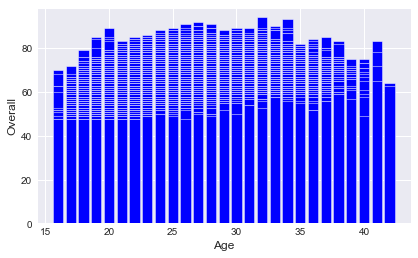

In [27]:
plt.bar('age', 'overall', data = df_fifa1, color = 'blue')
plt.xlabel("Age")
plt.ylabel("Overall")
plt.show()

In [28]:
line1 = linear_model.LinearRegression()

In [29]:
df_Potential = df_fifa.loc[:, "potential"].values.reshape(-1, 1) 
df_Overall = df_fifa.loc[:, "overall"].values.reshape(-1, 1)

In [30]:
line1.fit(df_Potential, df_Overall) 
pred1 = line1.predict(df_Potential)

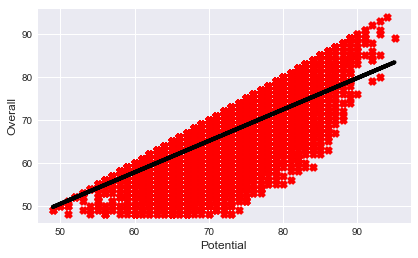

In [31]:
plt.scatter('potential', 'overall', data = df_fifa, marker = 'x', color = 'red')
plt.xlabel("Potential")
plt.ylabel("Overall")
plt.plot(df_Potential,pred1, color='black')
plt.show()

In [32]:
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
import plotly
import re
import os

In [33]:
#using plotly
fig = go.Figure(
    
    data = go.Scatter(
        x= df_fifa['overall'],
        y= df_fifa['value_eur'],
        mode= 'markers',
        marker = dict(
            size = 10,
            color = df_fifa['age'],
            showscale = True
        ),
        text = df_fifa['short_name'])
)
    
fig.update_layout(title=' Scatter Plot ( colored by  age) year 2020 - Overall ratings vs market value in euro'
                  , xaxis_title = 'Overall Rating'
                  , yaxis_title= 'Market Value in Euros')
fig.show()


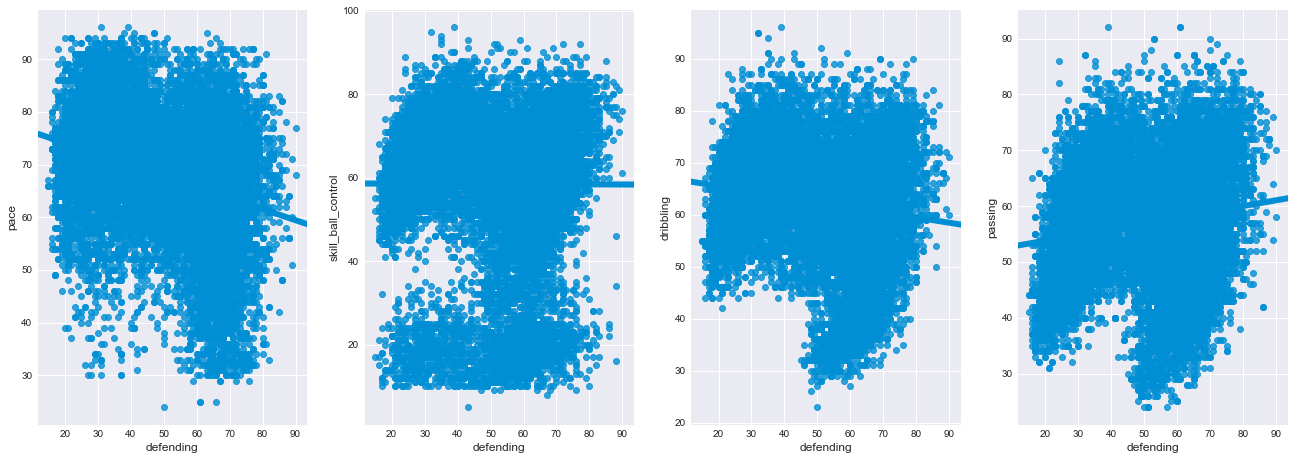

In [34]:
# Scater plot shows correlation between Acceleration and other chosen features
def make_scatter(random_subset,verses):
    feats = ('pace', 'skill_ball_control', 'dribbling', 'passing')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/4+1, 4, index+1)
        ax = sns.regplot(x = verses, y = feat, data = df_fifa)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.6)

make_scatter(x_data,'defending')


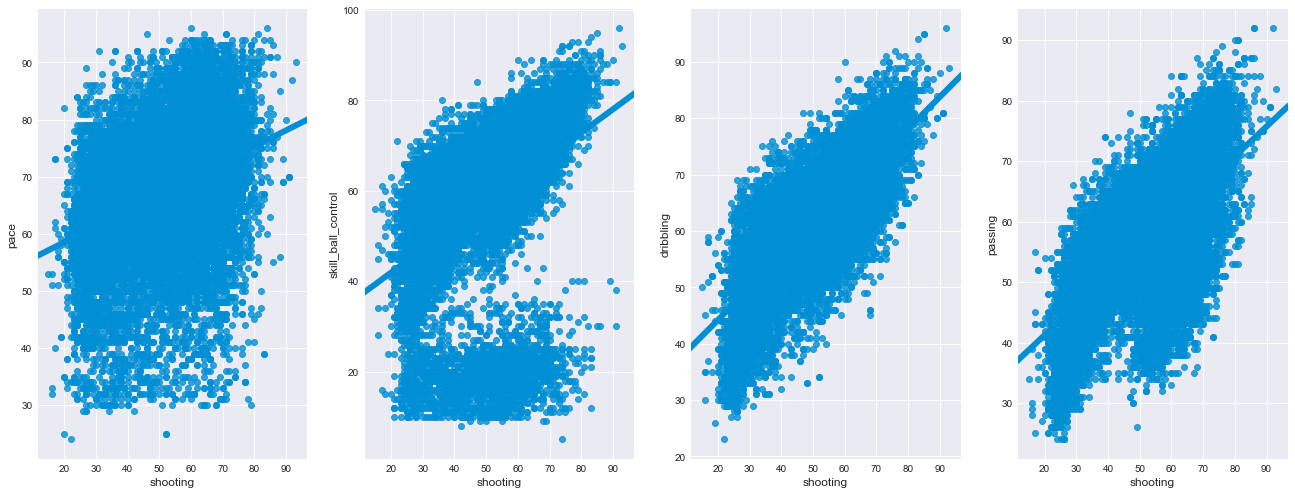

In [35]:
plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.4)
make_scatter(x_data,'shooting')

In [36]:
fig = px.pie(df_fifa, names = 'preferred_foot', title= 'percentage of the players preferred foot') 
fig.show()

In [37]:
attack = ['RW', 'LW', 'ST', 'CF', 'LS', 'RS', 'RF', 'LF']

sample_att = df_fifa.query('team_position in @attack')
sample_att.head()

sofifa_id                                         player_url  \
0      158023  https://sofifa.com/player/158023/lionel-messi/...   
1       20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
4      183277  https://sofifa.com/player/183277/eden-hazard/2...   
9      209331  https://sofifa.com/player/209331/mohamed-salah...   
10     231747  https://sofifa.com/player/231747/kylian-mbappe...   

           short_name                            long_name  age         dob  \
0            L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1   Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
4           E. Hazard                          Eden Hazard   28  1991-01-07   
9            M. Salah                 Mohamed  Salah Ghaly   27  1992-06-15   
10          K. Mbappé                        Kylian Mbappé   20  1998-12-20   

    height_cm  weight_kg nationality                 club  overall  potential  \
0         170         72   Argentina         FC Barcelona       94         94   
1         187         83    Portugal             Juventus       93         93   
4         175         74     Belgium          Real Madrid       91         91   
9         175         71       Egypt            Liverpool       90         90   
10        178         73      France  Paris Saint-Germain       89         95   

    value_eur  wage_eur preferred_foot  international_reputation  weak_foot  \
0    95500000    565000           Left                         5          4   
1    58500000    405000          Right                         5          4   
4    90000000    470000          Right                         4          4   
9    80500000    240000           Left                         3          3   
10   93500000    155000          Right                         3          4   

    skill_moves    work_rate            body_type real_face  \
0             4   Medium/Low                Messi       Yes   
1             5     High/Low           C. Ronaldo       Yes   
4             4  High/Medium               Normal       Yes   
9             4  High/Medium  PLAYER_BODY_TYPE_25       Yes   
10            5     High/Low               Normal       Yes   

    release_clause_eur                                        player_tags  \
0          195800000.0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...   
1           96500000.0  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
4          184500000.0                    #Speedster, #Dribbler, #Acrobat   
9          148900000.0  #Speedster, #Dribbler, #Acrobat, #Clinical Fin...   
10         191700000.0                    #Speedster, #Dribbler, #Acrobat   

   team_position  team_jersey_number loaned_from      joined  \
0             RW                10.0         NaN  2004-07-01   
1             LW                 7.0         NaN  2018-07-10   
4             LW                 7.0         NaN  2019-07-01   
9             RW                11.0         NaN  2017-07-01   
10            RW                 7.0         NaN  2018-07-01   

    contract_valid_until nation_position  nation_jersey_number  pace  \
0                 2021.0             NaN                   NaN  87.0   
1                 2022.0              LS                   7.0  90.0   
4                 2024.0              LF                  10.0  91.0   
9                 2023.0              RW                  10.0  93.0   
10                2022.0              RM                  10.0  96.0   

    shooting  passing  dribbling  defending  physic  gk_diving  gk_handling  \
0       92.0     92.0       96.0       39.0    66.0        NaN          NaN   
1       93.0     82.0       89.0       35.0    78.0        NaN          NaN   
4       83.0     86.0       94.0       35.0    66.0       87.0         92.0   
9       86.0     81.0       89.0       45.0    74.0       88.0         85.0   
10      84.0     78.0       90.0       39.0    75.0       88.0         85.0   

    gk_kicking  gk_refl

In [38]:
fig = px.pie(sample_att, names='team_position', color_discrete_sequence= px.colors.sequential.Magma_r, 
            title = '% of Players in Attacker Position')
fig.show()

In [39]:
mid = ['CAM', 'RCM', 'CDM', 'LDM', 'RM', 'LCM', 'LM', 'RDM', 'RAM','CM', 'LAM']

sample_mid = df_fifa.query('team_position in @mid')
sample_mid.head()

sofifa_id                                         player_url  \
2      190871  https://sofifa.com/player/190871/neymar-da-sil...   
5      192985  https://sofifa.com/player/192985/kevin-de-bruy...   
8      177003  https://sofifa.com/player/177003/luka-modric/2...   
15     215914  https://sofifa.com/player/215914/ngolo-kante/2...   
21     189511  https://sofifa.com/player/189511/sergio-busque...   

         short_name                      long_name  age         dob  \
2         Neymar Jr  Neymar da Silva Santos Junior   27  1992-02-05   
5      K. De Bruyne                Kevin De Bruyne   28  1991-06-28   
8         L. Modrić                    Luka Modrić   33  1985-09-09   
15         N. Kanté                   N'Golo Kanté   28  1991-03-29   
21  Sergio Busquets       Sergio Busquets i Burgos   30  1988-07-16   

    height_cm  weight_kg nationality                 club  overall  potential  \
2         175         68      Brazil  Paris Saint-Germain       92         92   
5         181         70     Belgium      Manchester City       91         91   
8         172         66     Croatia          Real Madrid       90         90   
15        168         72      France              Chelsea       89         90   
21        189         76       Spain         FC Barcelona       89         89   

    value_eur  wage_eur preferred_foot  international_reputation  weak_foot  \
2   105500000    290000          Right                         5          5   
5    90000000    370000          Right                         4          5   
8    45000000    340000          Right                         4          4   
15   66000000    235000          Right                         3          3   
21   55000000    300000          Right                         4          3   

    skill_moves      work_rate body_type real_face  release_clause_eur  \
2             5    High/Medium    Neymar       Yes         195200000.0   
5             4      High/High    Normal       Yes         166500000.0   
8             4      High/High      Lean       Yes          92300000.0   
15            2    Medium/High    Normal       Yes         130400000.0   
21            3  Medium/Medium      Lean       Yes         112800000.0   

                                          player_tags team_position  \
2   #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
5   #Dribbler, #Playmaker  , #Engine, #Distance Sh...           RCM   
8   #Dribbler, #Playmaker  , #Crosser, #Acrobat, #...           RCM   
15                            #Tackling , #Tactician            RCM   
21                          #Playmaker  , #Tactician            CDM   

    team_jersey_number loaned_from      joined  contract_valid_until  \
2                 10.0         NaN  2017-08-03                2022.0   
5                 17.0         NaN  2015-08-30                2023.0   
8                 10.0         NaN  2012-08-01                2020.0   
15                 7.0         NaN  2016-07-16                2023.0   
21                 5.0         NaN  2008-09-01                2023.0   

   nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
2               LW                  10.0  91.0      85.0     87.0       95.0   
5              RCM                   7.0  76.0      86.0     92.0       86.0   
8              LCB                   4.0  74.0      76.0     89.0       89.0   
15             LDM                  13.0  78.0      65.0     77.0       81.0   
21             CDM                   5.0  42.0      62.0     80.0       80.0   

    defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
2        32.0    58.0        NaN          NaN         NaN          NaN   
5        61.0    78.0       87.0         92.0        78.0         89.0   
8        72.0    66.0       88.0         85.0        88.0         90.0   
15       87.0    83.0       90.0         84.0        81.0         92.0   
21       85.0    80.0       90.0         84.0     

In [40]:
fig = px.pie(sample_mid, names='team_position', color_discrete_sequence= px.colors.sequential.Blugrn_r ,
            title = '% of Players in MidField Position')
fig.show()

In [41]:
defence = ['LCB', 'RCB', 'LB', 'RB', 'CB', 'RWB', 'LWB']
sample_def = df_fifa.query('team_position in @defence')
sample_def.head()

sofifa_id                                         player_url  \
7      203376  https://sofifa.com/player/203376/virgil-van-di...   
11     201024  https://sofifa.com/player/201024/kalidou-kouli...   
16     138956  https://sofifa.com/player/138956/giorgio-chiel...   
18     155862  https://sofifa.com/player/155862/sergio-ramos-...   
29     152729  https://sofifa.com/player/152729/gerard-pique-...   

      short_name              long_name  age         dob  height_cm  \
7    V. van Dijk        Virgil van Dijk   27  1991-07-08        193   
11  K. Koulibaly      Kalidou Koulibaly   28  1991-06-20        187   
16  G. Chiellini      Giorgio Chiellini   34  1984-08-14        187   
18  Sergio Ramos    Sergio Ramos García   33  1986-03-30        184   
29         Piqué  Gerard Piqué Bernabéu   32  1987-02-02        194   

    weight_kg  nationality          club  overall  potential  value_eur  \
7          92  Netherlands     Liverpool       90         91   78000000   
11         89      Senegal        Napoli       89         91   67500000   
16         85        Italy      Juventus       89         89   24500000   
18         82        Spain   Real Madrid       89         89   31500000   
29         85        Spain  FC Barcelona       88         88   38000000   

    wage_eur preferred_foot  international_reputation  weak_foot  skill_moves  \
7     200000          Right                         3          3            2   
11    150000          Right                         3          3            2   
16    215000           Left                         4          3            2   
18    300000          Right                         4          3            3   
29    285000          Right                         4          3            2   

        work_rate body_type real_face  release_clause_eur  \
7   Medium/Medium    Normal       Yes         150200000.0   
11    Medium/High    Normal       Yes         119800000.0   
16    Medium/High    Normal       Yes          40400000.0   
18    High/Medium    Normal       Yes          64600000.0   
29    High/Medium    Normal       Yes          77900000.0   

                                          player_tags team_position  \
7   #Tackling , #Tactician , #Strength, #Complete ...           LCB   
11  #Tackling , #Tactician , #Strength, #Complete ...           LCB   
16  #Tackling , #Tactician , #Strength, #Complete ...           LCB   
18  #Aerial Threat, #Tackling , #Tactician , #Comp...           LCB   
29  #Aerial Threat, #Tackling , #Tactician , #Stre...           RCB   

    team_jersey_number loaned_from      joined  contract_valid_until  \
7                  4.0         NaN  2018-01-01                2023.0   
11                26.0         NaN  2014-07-01                2021.0   
16                 3.0         NaN  2005-07-01                2020.0   
18                 4.0         NaN  2005-08-01                2020.0   
29                 3.0         NaN  2008-07-01                2022.0   

   nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
7              LCB                   4.0  77.0      60.0     70.0       71.0   
11              RM                  10.0  71.0      28.0     54.0       67.0   
16             LCB                   3.0  68.0      46.0     58.0       60.0   
18             RCB                  15.0  72.0      68.0     75.0       73.0   
29              GK                   1.0  56.0      61.0     72.0       68.0   

    defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
7        90.0    86.0       88.0         85.0        88.0         90.0   
11       89.0    87.0       88.0         85.0        88.0         90.0   
16       90.0    82.0       90.0         84.0        81.0         92.0   
18       87.0    85.0       90.0         84.0        81.0         92.0   
29       88.0    80.0       85.0         89.0        72.0         87.0   

    gk_speed  gk_positioning  \
7       45.0            88.0   
11      45.0 

In [42]:
fig = px.pie(sample_def, names='team_position', color_discrete_sequence= px.colors.sequential.GnBu_r, 
            title = '% of Players in Defender Position')
fig.show()

In [43]:
def pick_top_player(pos, value):
    column = str('Position_')+str.upper(pos)
    target_player= df_fifa[(df_fifa[column] == 1) & (df_fifa['value_eur'] <= value)][['short_name','age','overall','value_eur']].head(5)
    
    return target_player

In [44]:
pick_top_player('lb',400000000)

short_name  age  overall  value_eur
40     A. Laporte   25       87   56500000
51     Jordi Alba   30       87   40000000
82   A. Robertson   25       85   43500000
92       D. Alaba   27       85   38000000
101       Marcelo   31       85   28000000

In [45]:
pick_top_player('cf',500000000)

short_name  age  overall  value_eur
0       L. Messi   32       94   95500000
4      E. Hazard   28       91   90000000
22  A. Griezmann   28       89   69000000
43        H. Son   26       87   60000000
46    K. Benzema   31       87   45000000

In [46]:
pick_top_player('ST',55000000)

short_name  age  overall  value_eur
19   L. Suárez   32       89   53000000
34   E. Cavani   32       88   47000000
46  K. Benzema   31       87   45000000
48  D. Mertens   32       87   40000000
54  L. Insigne   28       87   52000000

In [ ]:
pick_top_player('GK',400000000)

ML Modelling

In [47]:
import numpy as np
split = np.random.rand(len(df_fifa1)) < 0.875
train = df_fifa1[split]
test = df_fifa1[~split]

In [48]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [49]:
regr = linear_model.LinearRegression()


In [50]:
## Trainig & fitting the model
fifa_x_train = train[['age','value_eur','potential','wage_eur']]
fifa_y_train = train[['overall']]
poly = PolynomialFeatures(degree=4)
fifa_x_train_poly = poly.fit_transform(fifa_x_train)
regr.fit(fifa_x_train_poly, fifa_y_train)

LinearRegression()

In [51]:
## Testing the model
fifa_x_test = test[['age','value_eur','potential', 'wage_eur']]
fifa_y_test = test[['overall']]
fifa_x_test_poly = poly.fit_transform(fifa_x_test)

In [52]:
df_fifa_pred = regr.predict(fifa_x_test_poly)

In [53]:
r2_score(fifa_y_test, df_fifa_pred)

0.973448980119587

In [54]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(fifa_y_test, df_fifa_pred)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  [0.98670597] and a P-value of: [0.]


In [55]:
fifa_x_test['Predicted Ratings'] = df_fifa_pred

In [56]:
df_fifa2 = pd.merge(df_fifa1,fifa_x_test)
df_fifa2.head(20)

short_name  age  overall  potential  value_eur  wage_eur  \
0    V. van Dijk   27       90         91       78.0      20.0   
1       M. Salah   27       90         90       80.5      24.0   
2   Sergio Ramos   33       89         89       31.5      30.0   
3     C. Eriksen   27       88         89       68.0      20.5   
4     Marquinhos   25       86         90       51.5      12.0   
5     I. Rakitić   31       86         86       38.0      24.5   
6      M. Pjanić   29       86         86       42.5      18.0   
7     M. de Ligt   19       85         93       50.0       7.6   
8        Fabinho   25       85         89       45.0      12.5   
9      R. Lukaku   26       85         86       46.0      11.5   
10     M. Icardi   26       85         86       46.0      11.5   
11       Marcelo   31       85         85       28.0      20.5   
12     J. Sancho   19       84         92       44.5       6.1   
13        Arthur   22       84         89       41.0      18.0   
14   L. Goretzka   24       84         88       40.0      12.0   
15  Luis Alberto   26       84         86       37.5       7.8   
16   Alex Telles   26       84         86       33.0       2.3   
17     M. Hamšík   31       84         84       26.5       2.6   
18      Sokratis   31       84         84       23.0      11.5   
19   Lucas Leiva   32       84         84       20.5       7.1   

    Predicted Ratings  
0           91.853324  
1           97.067478  
2           79.205139  
3           92.487286  
4           87.063556  
5           88.215104  
6           86.773218  
7           96.315648  
8           85.333938  
9           87.675197  
10          87.675197  
11          86.254421  
12          94.084769  
13          82.986104  
14          83.278716  
15          83.422444  
16          82.295157  
17          87.880818  
18          86.560726  
19          86.733558

In [57]:
df_fifa_pred2 = regr.predict(fifa_x_train_poly)
fifa_x_train['Predicted Ratings'] = df_fifa_pred2

In [58]:
df_fifa3 = pd.merge(df_fifa1,fifa_x_train)
df_fifa3.head(20)

short_name  age  overall  potential  value_eur  wage_eur  \
0            L. Messi   32       94         94       95.5      56.5   
1   Cristiano Ronaldo   34       93         93       58.5      40.5   
2           Neymar Jr   27       92         92      105.5      29.0   
3            J. Oblak   26       91         93       77.5      12.5   
4           E. Hazard   28       91         91       90.0      47.0   
5        K. De Bruyne   28       91         91       90.0      37.0   
6       M. ter Stegen   27       90         93       67.5      25.0   
7           L. Modrić   33       90         90       45.0      34.0   
8           K. Mbappé   20       89         95       93.5      15.5   
9        K. Koulibaly   28       89         91       67.5      15.0   
10            H. Kane   25       89         91       83.0      22.0   
11            Alisson   26       89         91       58.0      15.5   
12             De Gea   28       89         90       56.0      20.5   
13           N. Kanté   28       89         90       66.0      23.5   
14       G. Chiellini   34       89         89       24.5      21.5   
15          S. Agüero   31       89         89       60.0      30.0   
16          L. Suárez   32       89         89       53.0      35.5   
17     R. Lewandowski   30       89         89       64.5      23.5   
18    Sergio Busquets   30       89         89       55.0      30.0   
19       A. Griezmann   28       89         89       69.0      37.0   

    Predicted Ratings  
0           93.676119  
1           89.169125  
2           92.489069  
3           90.587172  
4           92.764894  
5           87.510723  
6           90.411624  
7           90.605137  
8           87.972314  
9           87.969879  
10          93.378919  
11          89.208019  
12          88.428868  
13          87.577519  
14          87.141919  
15          89.954752  
16          89.652882  
17          88.074399  
18          89.839475  
19          89.856837

## USING FIFA 20 ratings to predict FIFA 21 top 11+8 players and their ratings

In [59]:

df_data_2 = pd.read_csv('players_20.csv')
df_data_2.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [60]:
df_fifa4 = df_data_2[['short_name','age','overall','potential', 'value_eur', 'wage_eur']]

In [61]:
df_fifa4['value_eur'] = df_fifa4['value_eur']/1000000
df_fifa4['wage_eur'] = df_fifa4['wage_eur']/10000

In [62]:

df_fifa4.head()

short_name  age  overall  potential  value_eur  wage_eur
0           L. Messi   32       94         94       95.5      56.5
1  Cristiano Ronaldo   34       93         93       58.5      40.5
2          Neymar Jr   27       92         92      105.5      29.0
3           J. Oblak   26       91         93       77.5      12.5
4          E. Hazard   28       91         91       90.0      47.0

In [63]:

df_fifa4.shape

(18278, 6)

In [64]:

df_fifa4.corr()

age   overall  potential  value_eur  wage_eur
age        1.000000  0.464305  -0.262872   0.081513  0.151031
overall    0.464305  1.000000   0.646650   0.638230  0.573578
potential -0.262872  0.646650   1.000000   0.580868  0.475490
value_eur  0.081513  0.638230   0.580868   1.000000  0.858052
wage_eur   0.151031  0.573578   0.475490   0.858052  1.000000

ML MODELLING

In [65]:
import numpy as np
split = np.random.rand(len(df_fifa4)) < 0.75
train2 = df_fifa4[split]
test2 = df_fifa4[~split]

In [66]:
regr2 = linear_model.LinearRegression()

In [67]:
## Trainig & fitting the model
fifa_x_train2 = train2[['age','value_eur','potential','wage_eur']]
fifa_y_train2 = train2[['overall']]
poly = PolynomialFeatures(degree=4)
fifa_x_train_poly2 = poly.fit_transform(fifa_x_train2)
regr2.fit(fifa_x_train_poly2, fifa_y_train2)

LinearRegression()

In [68]:
## Testing the model
fifa_x_test2 = test2[['age','value_eur','potential','wage_eur']]
fifa_y_test2 = test2[['overall']]
fifa_x_test_poly2 = poly.fit_transform(fifa_x_test2)

In [69]:
df_fifa_pred2 = regr2.predict(fifa_x_test_poly2)

In [70]:
r2_score(fifa_y_test2, df_fifa_pred2)

0.9613893496787884

In [71]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(fifa_y_test2, df_fifa_pred2)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  [0.98063218] and a P-value of: [0.]


In [72]:
fifa_x_test2['Predicted Ratings'] = df_fifa_pred2

In [73]:
df_fifa5 = pd.merge(df_fifa4,fifa_x_test2)
df_fifa5.head(20)

short_name  age  overall  potential  value_eur  wage_eur  \
0         J. Oblak   26       91         93       77.5      12.5   
1    M. ter Stegen   27       90         93       67.5      25.0   
2      V. van Dijk   27       90         91       78.0      20.0   
3        L. Modrić   33       90         90       45.0      34.0   
4           De Gea   28       89         90       56.0      20.5   
5        L. Suárez   32       89         89       53.0      35.5   
6   R. Lewandowski   30       89         89       64.5      23.5   
7         T. Kroos   29       88         88       57.0      33.0   
8       A. Laporte   25       87         90       56.5      19.5   
9       D. Mertens   32       87         87       40.0      13.5   
10      M. Hummels   30       87         87       41.0      13.0   
11          Thiago   28       87         87       50.0      18.0   
12      L. Insigne   28       87         87       52.0      14.0   
13         L. Sané   23       86         92       61.0      19.5   
14     A. Di María   31       86         86       39.0      15.0   
15       T. Müller   29       86         86       43.5      17.0   
16           Rodri   23       85         90       47.0      15.0   
17        D. Alaba   27       85         86       38.0      13.5   
18        Carvajal   27       85         86       38.0      20.5   
19  Z. Ibrahimović   37       85         85       14.0       1.5   

    Predicted Ratings  
0          125.425388  
1           99.764100  
2           93.482174  
3           87.581729  
4           89.050211  
5           85.987402  
6           88.268227  
7           76.505669  
8           85.154126  
9           83.054837  
10          87.634399  
11          86.547821  
12          89.286384  
13          86.137322  
14          88.447411  
15          86.722170  
16          83.982068  
17          84.206388  
18          79.568403  
19          36.568080

In [74]:
df_fifa_pred3 = regr2.predict(fifa_x_train_poly2)

In [75]:
fifa_x_train2['Predicted Ratings'] = df_fifa_pred3

In [76]:
df_fifa6 = pd.merge(df_fifa4,fifa_x_train2)
df_fifa6.head(20)

short_name  age  overall  potential  value_eur  wage_eur  \
0            L. Messi   32       94         94       95.5      56.5   
1   Cristiano Ronaldo   34       93         93       58.5      40.5   
2           Neymar Jr   27       92         92      105.5      29.0   
3           E. Hazard   28       91         91       90.0      47.0   
4        K. De Bruyne   28       91         91       90.0      37.0   
5            M. Salah   27       90         90       80.5      24.0   
6           K. Mbappé   20       89         95       93.5      15.5   
7        K. Koulibaly   28       89         91       67.5      15.0   
8             H. Kane   25       89         91       83.0      22.0   
9             Alisson   26       89         91       58.0      15.5   
10           N. Kanté   28       89         90       66.0      23.5   
11       G. Chiellini   34       89         89       24.5      21.5   
12          S. Agüero   31       89         89       60.0      30.0   
13       Sergio Ramos   33       89         89       31.5      30.0   
14    Sergio Busquets   30       89         89       55.0      30.0   
15       A. Griezmann   28       89         89       69.0      37.0   
16          P. Dybala   25       88         92       76.5      21.5   
17           P. Pogba   26       88         91       72.5      25.0   
18            Ederson   25       88         91       54.5      18.5   
19        R. Sterling   24       88         90       73.0      25.5   

    Predicted Ratings  
0           94.348420  
1           94.529015  
2           92.377282  
3           91.776744  
4           93.370512  
5           87.176966  
6           90.155523  
7           91.755687  
8           85.301250  
9           89.302481  
10          86.400595  
11          89.067646  
12          94.891461  
13          87.827887  
14          86.732334  
15          81.216994  
16          84.097689  
17          84.419109  
18          88.156660  
19          95.703284

In [77]:
df_fifa7 = df_fifa1[['age','value_eur','potential','wage_eur']]
df_fifa8 = poly.fit_transform(df_fifa7)

In [78]:
df_fifa_pred4 = regr2.predict(df_fifa8)

In [79]:
df_fifa7['FIFA 21 Predicted Ratings'] = df_fifa_pred4

In [80]:
df_fifa7.head()

age  value_eur  potential  wage_eur  FIFA 21 Predicted Ratings
0   32       95.5         94      56.5                  94.348420
1   34       58.5         93      40.5                  94.529015
2   27      105.5         92      29.0                  92.377282
3   26       77.5         93      12.5                 125.425388
4   28       90.0         91      47.0                  91.776744

In [81]:
df_fifa9 = pd.merge(df_fifa1,df_fifa7)

In [82]:
df_fifa9.head(20)

short_name  age  overall  potential  value_eur  wage_eur  \
0            L. Messi   32       94         94       95.5      56.5   
1   Cristiano Ronaldo   34       93         93       58.5      40.5   
2           Neymar Jr   27       92         92      105.5      29.0   
3            J. Oblak   26       91         93       77.5      12.5   
4           E. Hazard   28       91         91       90.0      47.0   
5        K. De Bruyne   28       91         91       90.0      37.0   
6       M. ter Stegen   27       90         93       67.5      25.0   
7         V. van Dijk   27       90         91       78.0      20.0   
8           L. Modrić   33       90         90       45.0      34.0   
9            M. Salah   27       90         90       80.5      24.0   
10          K. Mbappé   20       89         95       93.5      15.5   
11       K. Koulibaly   28       89         91       67.5      15.0   
12            H. Kane   25       89         91       83.0      22.0   
13            Alisson   26       89         91       58.0      15.5   
14             De Gea   28       89         90       56.0      20.5   
15           N. Kanté   28       89         90       66.0      23.5   
16       G. Chiellini   34       89         89       24.5      21.5   
17          S. Agüero   31       89         89       60.0      30.0   
18       Sergio Ramos   33       89         89       31.5      30.0   
19          L. Suárez   32       89         89       53.0      35.5   

    FIFA 21 Predicted Ratings  
0                   94.348420  
1                   94.529015  
2                   92.377282  
3                  125.425388  
4                   91.776744  
5                   93.370512  
6                   99.764100  
7                   93.482174  
8                   87.581729  
9                   87.176966  
10                  90.155523  
11                  91.755687  
12                  85.301250  
13                  89.302481  
14                  89.050211  
15                  86.400595  
16                  89.067646  
17                  94.891461  
18                  87.827887  
19                  85.987402

In [83]:
## The predicted top 19 for FIFA 21 footballers with their ratings
df_fifa9 = df_fifa9.sort_values('FIFA 21 Predicted Ratings', ascending = False).reset_index()
df_fifa9.drop("index", axis = 1, inplace = True)
df_fifa9.head(20)

short_name  age  overall  potential  value_eur  wage_eur  \
0            J. Oblak   26       91         93       77.5      12.5   
1       M. ter Stegen   27       90         93       67.5      25.0   
2         R. Sterling   24       88         90       73.0      25.5   
3           S. Agüero   31       89         89       60.0      30.0   
4   Cristiano Ronaldo   34       93         93       58.5      40.5   
5            L. Messi   32       94         94       95.5      56.5   
6         V. van Dijk   27       90         91       78.0      20.0   
7        K. De Bruyne   28       91         91       90.0      37.0   
8         David Silva   33       88         88       36.0      26.5   
9           Neymar Jr   27       92         92      105.5      29.0   
10          E. Hazard   28       91         91       90.0      47.0   
11       K. Koulibaly   28       89         91       67.5      15.0   
12           K. Navas   32       87         87       30.5      19.5   
13        W. Szczęsny   29       86         88       37.5      13.5   
14          K. Mbappé   20       89         95       93.5      15.5   
15      J. Vertonghen   32       87         87       32.5      15.5   
16         L. Bonucci   32       86         86       28.5      16.0   
17         F. de Jong   22       85         91       52.0      19.5   
18            Alisson   26       89         91       58.0      15.5   
19         L. Insigne   28       87         87       52.0      14.0   

    FIFA 21 Predicted Ratings  
0                  125.425388  
1                   99.764100  
2                   95.703284  
3                   94.891461  
4                   94.529015  
5                   94.348420  
6                   93.482174  
7                   93.370512  
8                   92.599516  
9                   92.377282  
10                  91.776744  
11                  91.755687  
12                  91.056094  
13                  90.438411  
14                  90.155523  
15                  89.967069  
16                  89.652274  
17                  89.341992  
18                  89.302481  
19                  89.286384

In [84]:
r2_score(df_fifa9['overall'], df_fifa9['FIFA 21 Predicted Ratings'])

0.9751724375249999

In [85]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df_fifa9['overall'], df_fifa9['FIFA 21 Predicted Ratings'])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  0.9875185720968196 and a P-value of: 0.0
